# 과적합 피하기 - 초음파 광물 데이터

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

- 데이터 전처리

In [42]:
# from google.colab import files
# up = files.upload()

In [43]:
df = pd.read_csv("sonar.csv", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [44]:
df[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

In [45]:
# X data: scaling
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(df.iloc[:,:-1].values)

In [46]:
# Y data: label encoding
from sklearn.preprocessing import LabelEncoder
y_labeled = LabelEncoder().fit_transform(df[60].values)

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_labeled, stratify=y_labeled, test_size=0.2, random_state=seed
)

### 모델 정의/설정/학습/평가

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

- Case 1) 은닉층 2개

In [49]:
model1 = Sequential([
    Dense(80, input_dim=60, activation='relu'),
    Dense(12, activation='relu'),
    Dense(1, activation='sigmoid')
])
model1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 80)                4880      
                                                                 
 dense_38 (Dense)            (None, 12)                972       
                                                                 
 dense_39 (Dense)            (None, 1)                 13        
                                                                 
Total params: 5,865
Trainable params: 5,865
Non-trainable params: 0
_________________________________________________________________


In [51]:
model1.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
hist1 = model1.fit(X_train, y_train, validation_split=0.2,
                   epochs=200, batch_size=100, verbose=0)

In [52]:
model1.evaluate(X_test, y_test)

2/2 [==============================] - 0s 4ms/step - loss: 0.3303 - accuracy: 0.9048


[0.33029451966285706, 0.9047619104385376]

In [53]:
params1, acc1 = 5865, 0.9048

- Case 2) 은닉층 4개

In [54]:
model2 = Sequential([
    Dense(80, input_dim=60, activation='relu'),
    Dense(48, activation='relu'),
    Dense(20, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 80)                4880      
                                                                 
 dense_41 (Dense)            (None, 48)                3888      
                                                                 
 dense_42 (Dense)            (None, 20)                980       
                                                                 
 dense_43 (Dense)            (None, 8)                 168       
                                                                 
 dense_44 (Dense)            (None, 1)                 9         
                                                                 
Total params: 9,925
Trainable params: 9,925
Non-trainable params: 0
_________________________________________________________________


In [62]:
model2.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
hist2 = model2.fit(X_train, y_train, validation_split=0.2,
                   epochs=200, batch_size=100, verbose=0)
model2.evaluate(X_test, y_test)

2/2 [==============================] - 0s 6ms/step - loss: 0.4749 - accuracy: 0.8571


[0.4749058187007904, 0.8571428656578064]

In [63]:
prams2, acc2 = 9925, 0.8571

- Case 2) 은닉층 6개

In [67]:
model3 = Sequential([
    Dense(80, input_dim=60, activation='relu'),
    Dense(64, activation='relu'),
    Dense(40, activation='relu'),
    Dense(24, activation='relu'),
    Dense(10, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model3.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 80)                4880      
                                                                 
 dense_67 (Dense)            (None, 64)                5184      
                                                                 
 dense_68 (Dense)            (None, 40)                2600      
                                                                 
 dense_69 (Dense)            (None, 24)                984       
                                                                 
 dense_70 (Dense)            (None, 10)                250       
                                                                 
 dense_71 (Dense)            (None, 4)                 44        
                                                                 
 dense_72 (Dense)            (None, 1)               

In [68]:
model3.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
hist3 = model3.fit(X_train, y_train, validation_split=0.2,
                   epochs=200, batch_size=100, verbose=0)
model3.evaluate(X_test, y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.5721 - accuracy: 0.8333


[0.5720630288124084, 0.8333333134651184]

In [59]:
prams3, acc3 = 13947, 0.8333

- Case 4) 은닉층 8개

In [69]:
model4 = Sequential([
    Dense(80, input_dim=60, activation='relu'),
    Dense(64, activation='relu'),
    Dense(52, activation='relu'),
    Dense(48, activation='relu'),
    Dense(36, activation='relu'),
    Dense(24, activation='relu'),
    Dense(10, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model4.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_73 (Dense)            (None, 80)                4880      
                                                                 
 dense_74 (Dense)            (None, 64)                5184      
                                                                 
 dense_75 (Dense)            (None, 52)                3380      
                                                                 
 dense_76 (Dense)            (None, 48)                2544      
                                                                 
 dense_77 (Dense)            (None, 36)                1764      
                                                                 
 dense_78 (Dense)            (None, 24)                888       
                                                                 
 dense_79 (Dense)            (None, 10)              

In [70]:
model4.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
hist4 = model4.fit(X_train, y_train, validation_split=0.2,
                   epochs=200, batch_size=100, verbose=0)
model4.evaluate(X_test, y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.7521 - accuracy: 0.8810


[0.7520874738693237, 0.8809523582458496]

In [71]:
param4, acc4 = 18939, 0.8810

- 학습과정 시각화

In [77]:
y_acc1 = hist1.history['accuracy']
y_acc2 = hist2.history['accuracy']
y_acc3 = hist3.history['accuracy']
y_acc4 = hist4.history['accuracy']

y_vloss1 = hist1.history['val_loss']
y_vloss2 = hist2.history['val_loss']
y_vloss3 = hist3.history['val_loss']
y_vloss4 = hist4.history['val_loss']

xs = np.arange(1, len(y_acc1)+1)

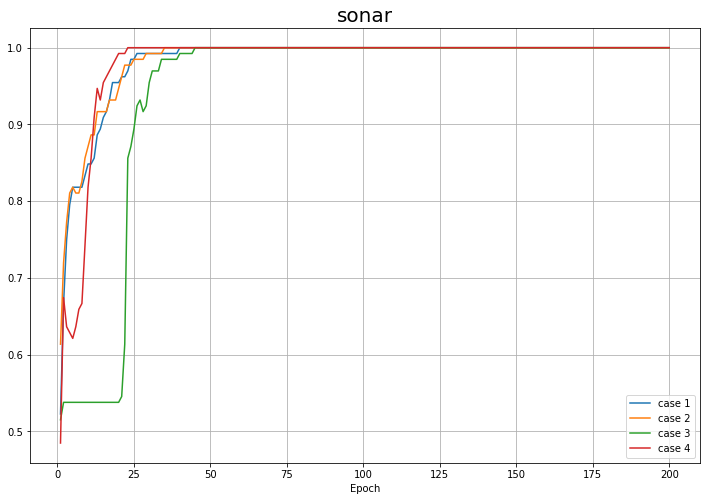

In [78]:
plt.figure(figsize=(12,8))
plt.title('sonar', size=20)
plt.plot(xs, y_acc1, label='case 1')
plt.plot(xs, y_acc2, label='case 2')
plt.plot(xs, y_acc3, label='case 3')
plt.plot(xs, y_acc4, label='case 4')

# plt.plot(xs, y_vloss1, label='validation loss')
plt.legend(), plt.grid(), plt.xlabel('Epoch')
plt.show()

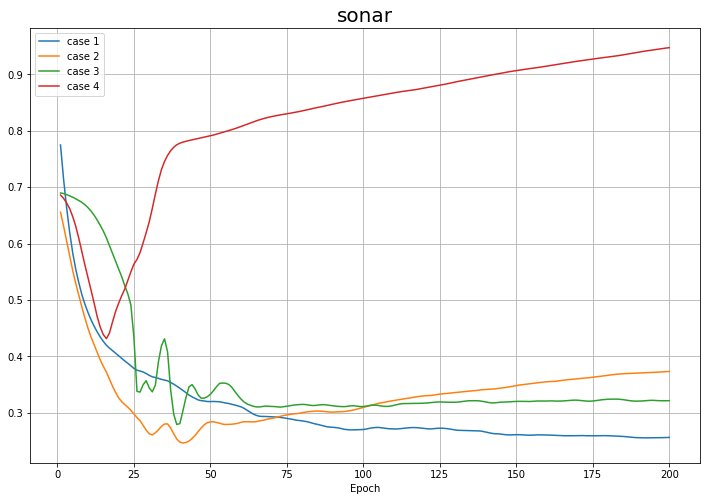

In [79]:
plt.figure(figsize=(12,8))
plt.title('sonar', size=20)

plt.plot(xs, y_vloss1, label='case 1')
plt.plot(xs, y_vloss2, label='case 2')
plt.plot(xs, y_vloss3, label='case 3')
plt.plot(xs, y_vloss4, label='case 4')

plt.legend(), plt.grid(), plt.xlabel('Epoch')
plt.show()

- Case 2에 대하여 베스트 모델

In [81]:
model = Sequential([
    Dense(80, input_dim=60, activation='relu'),
    Dense(48, activation='relu'),
    Dense(20, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_82 (Dense)            (None, 80)                4880      
                                                                 
 dense_83 (Dense)            (None, 48)                3888      
                                                                 
 dense_84 (Dense)            (None, 20)                980       
                                                                 
 dense_85 (Dense)            (None, 8)                 168       
                                                                 
 dense_86 (Dense)            (None, 1)                 9         
                                                                 
Total params: 9,925
Trainable params: 9,925
Non-trainable params: 0
_________________________________________________________________


In [84]:
model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

- 베스트 모델만 저장하는 콜백 함수

In [85]:
from tensorflow.keras.callbacks import ModelCheckpoint
mc = ModelCheckpoint('sonar_best.h5', monitor='val_loss', 
                     verbose=1, save_best_only=True)

In [87]:
# epoch가 종료될 때마다 callback 함수를 실행하도록 설정
hist = model.fit(X_train, y_train, validation_split=0.2,
                 epochs=200, batch_size=100, verbose=0,
                 callbacks=[mc])


Epoch 1: val_loss improved from inf to 0.67079, saving model to sonar_best.h5

Epoch 2: val_loss improved from 0.67079 to 0.64688, saving model to sonar_best.h5

Epoch 3: val_loss improved from 0.64688 to 0.62135, saving model to sonar_best.h5

Epoch 4: val_loss improved from 0.62135 to 0.59682, saving model to sonar_best.h5

Epoch 5: val_loss improved from 0.59682 to 0.57079, saving model to sonar_best.h5

Epoch 6: val_loss improved from 0.57079 to 0.54817, saving model to sonar_best.h5

Epoch 7: val_loss improved from 0.54817 to 0.52629, saving model to sonar_best.h5

Epoch 8: val_loss improved from 0.52629 to 0.50163, saving model to sonar_best.h5

Epoch 9: val_loss improved from 0.50163 to 0.47572, saving model to sonar_best.h5

Epoch 10: val_loss improved from 0.47572 to 0.45012, saving model to sonar_best.h5

Epoch 11: val_loss improved from 0.45012 to 0.42526, saving model to sonar_best.h5

Epoch 12: val_loss improved from 0.42526 to 0.40239, saving model to sonar_best.h5

Epoc

In [89]:
from tensorflow.keras.models import load_model

best_model = load_model('sonar_best.h5')

best_model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 4ms/step - loss: 0.6453 - accuracy: 0.8571


[0.6453332304954529, 0.8571428656578064]

In [90]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

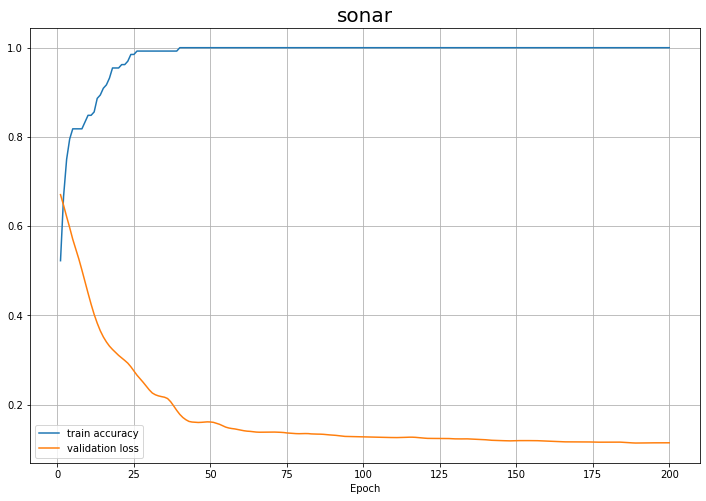

In [91]:
plt.figure(figsize=(12,8))
plt.title('sonar', size=20)
plt.plot(xs, y_acc1, label='train accuracy')
plt.plot(xs, y_vloss, label='validation loss')


# plt.plot(xs, y_vloss1, label='validation loss')
plt.legend(), plt.grid(), plt.xlabel('Epoch')
plt.show()

- 조기종료 콜백 함수

In [92]:
del model

In [93]:
model = Sequential([
    Dense(80, input_dim=60, activation='relu'),
    Dense(48, activation='relu'),
    Dense(20, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_87 (Dense)            (None, 80)                4880      
                                                                 
 dense_88 (Dense)            (None, 48)                3888      
                                                                 
 dense_89 (Dense)            (None, 20)                980       
                                                                 
 dense_90 (Dense)            (None, 8)                 168       
                                                                 
 dense_91 (Dense)            (None, 1)                 9         
                                                                 
Total params: 9,925
Trainable params: 9,925
Non-trainable params: 0
_________________________________________________________________


In [94]:
model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

In [96]:
from tensorflow.keras.callbacks import EarlyStopping
mc = ModelCheckpoint('sonar_best.h5', monitor='val_loss',
                     verbose=1, save_best_only=True)
es = EarlyStopping(patience=20)

In [97]:
# epoch가 종료될 때마다 callback 함수를 실행하도록 설정
hist = model.fit(X_train, y_train, validation_split=0.2,
                 epochs=200, batch_size=100, verbose=0,
                 callbacks=[mc, es])


Epoch 1: val_loss improved from inf to 0.62073, saving model to sonar_best.h5

Epoch 2: val_loss improved from 0.62073 to 0.58368, saving model to sonar_best.h5

Epoch 3: val_loss improved from 0.58368 to 0.55113, saving model to sonar_best.h5

Epoch 4: val_loss improved from 0.55113 to 0.52088, saving model to sonar_best.h5

Epoch 5: val_loss improved from 0.52088 to 0.49260, saving model to sonar_best.h5

Epoch 6: val_loss improved from 0.49260 to 0.46580, saving model to sonar_best.h5

Epoch 7: val_loss improved from 0.46580 to 0.44258, saving model to sonar_best.h5

Epoch 8: val_loss improved from 0.44258 to 0.42410, saving model to sonar_best.h5

Epoch 9: val_loss improved from 0.42410 to 0.40735, saving model to sonar_best.h5

Epoch 10: val_loss improved from 0.40735 to 0.38936, saving model to sonar_best.h5

Epoch 11: val_loss improved from 0.38936 to 0.37517, saving model to sonar_best.h5

Epoch 12: val_loss improved from 0.37517 to 0.36306, saving model to sonar_best.h5

Epoc

In [98]:
best_model = load_model('sonar_best.h5')
best_model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.5602 - accuracy: 0.7857


[0.5602021217346191, 0.7857142686843872]

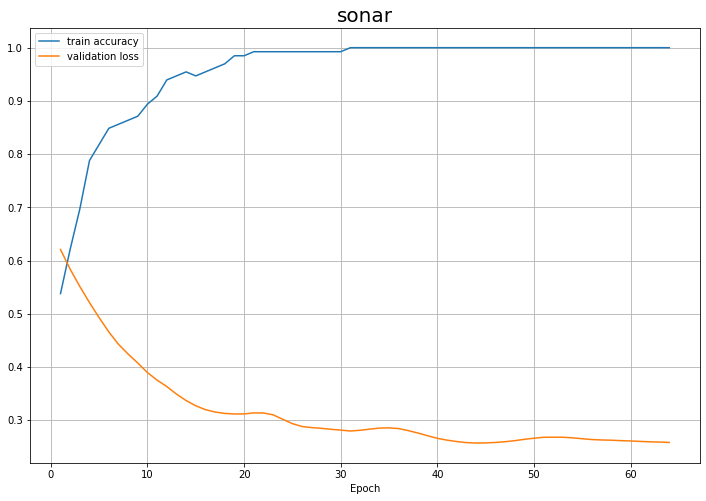

In [100]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

plt.figure(figsize=(12,8))
plt.title('sonar', size=20)
plt.plot(xs, y_acc, label='train accuracy')
plt.plot(xs, y_vloss, label='validation loss')


# plt.plot(xs, y_vloss1, label='validation loss')
plt.legend(), plt.grid(), plt.xlabel('Epoch')
plt.show()